# INFOTECH PRODIGY - TASK-03

### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
data= pd.read_csv(r"C:\Users\HP\Documents\Datasets\test.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
data.duplicated().sum()

0

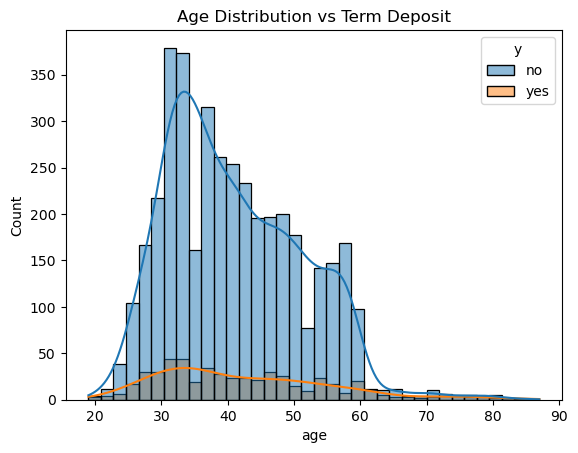

In [7]:
sns.histplot(data= data, x= "age", kde= True, hue= "y")
plt.title("Age Distribution vs Term Deposit")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5256\2181021213.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data= data, x= 'job', hue= 'y', palette= sns.color_palette('muted'))


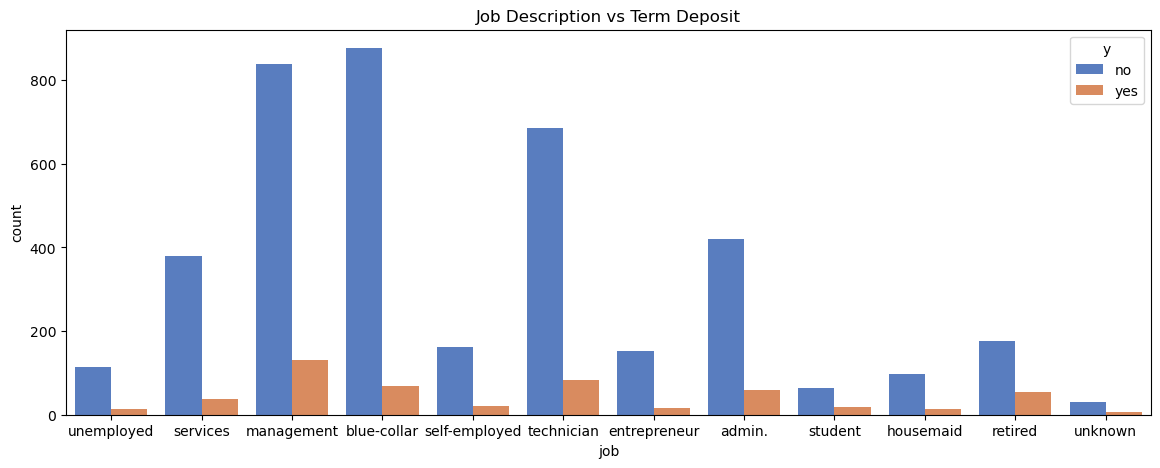

In [8]:
plt.figure(figsize= (14,5))
sns.countplot(data= data, x= 'job', hue= 'y', palette= sns.color_palette('muted'))
plt.title('Job Description vs Term Deposit')
plt.show()

In [9]:
data['default'].value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

Text(0.5, 1.0, 'Housing Loan taken vs Term Deposit')

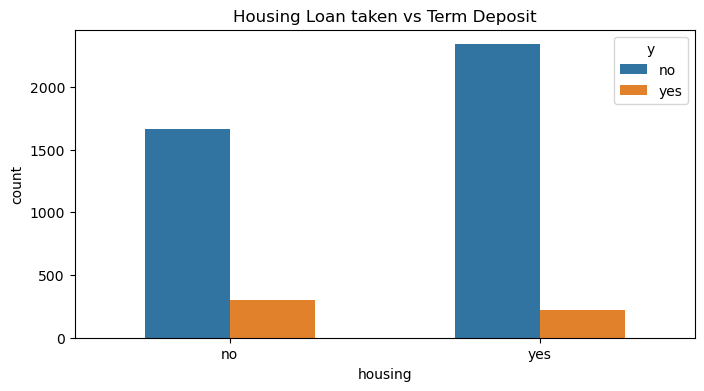

In [10]:
plt.figure(figsize= (8,4))
sns.countplot(x= 'housing', data= data, hue= 'y', width= 0.55)
plt.title('Housing Loan taken vs Term Deposit')

Text(0.5, 1.0, 'Personal Loan taken vs Term Deposit')

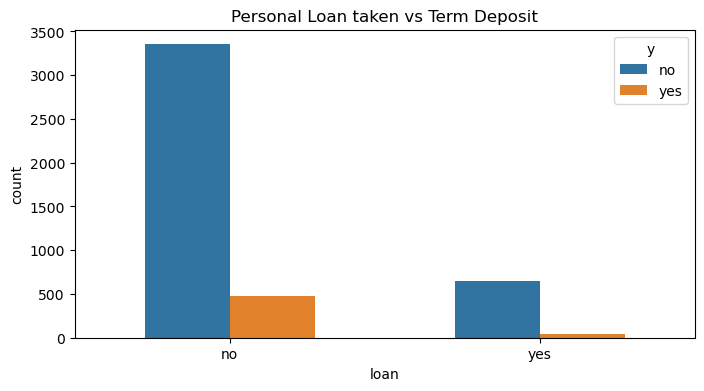

In [11]:
plt.figure(figsize= (8,4))
sns.countplot(x= 'loan', data= data, hue= 'y', width= 0.55)
plt.title('Personal Loan taken vs Term Deposit')

Text(0.5, 1.0, 'Previous Campaign Outcome vs Term Deposit')

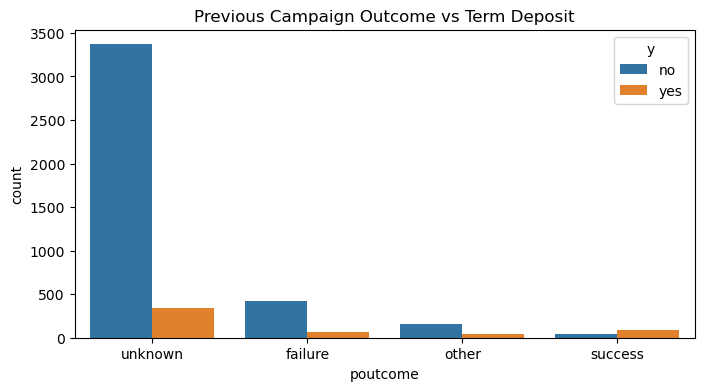

In [12]:
plt.figure(figsize= (8,4))
sns.countplot(x= 'poutcome', data= data, hue= 'y')
plt.title('Previous Campaign Outcome vs Term Deposit')

y
no     4000
yes     521
Name: count, dtype: int64



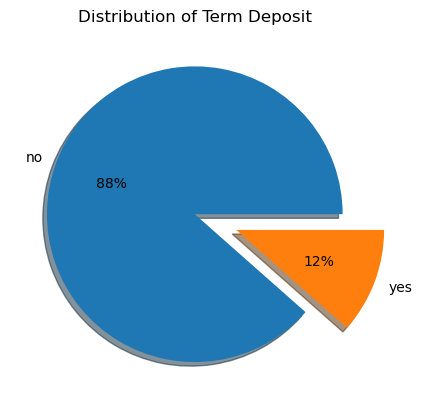

In [13]:
print(data.y.value_counts())
print()
keys= data.y.value_counts().index
val= data.y.value_counts().values
plt.title('Distribution of Term Deposit')
explode= [0.0, 0.3]
plt.pie(val, labels= keys, explode= explode, autopct= '%.0f%%', shadow= True)
plt.show()

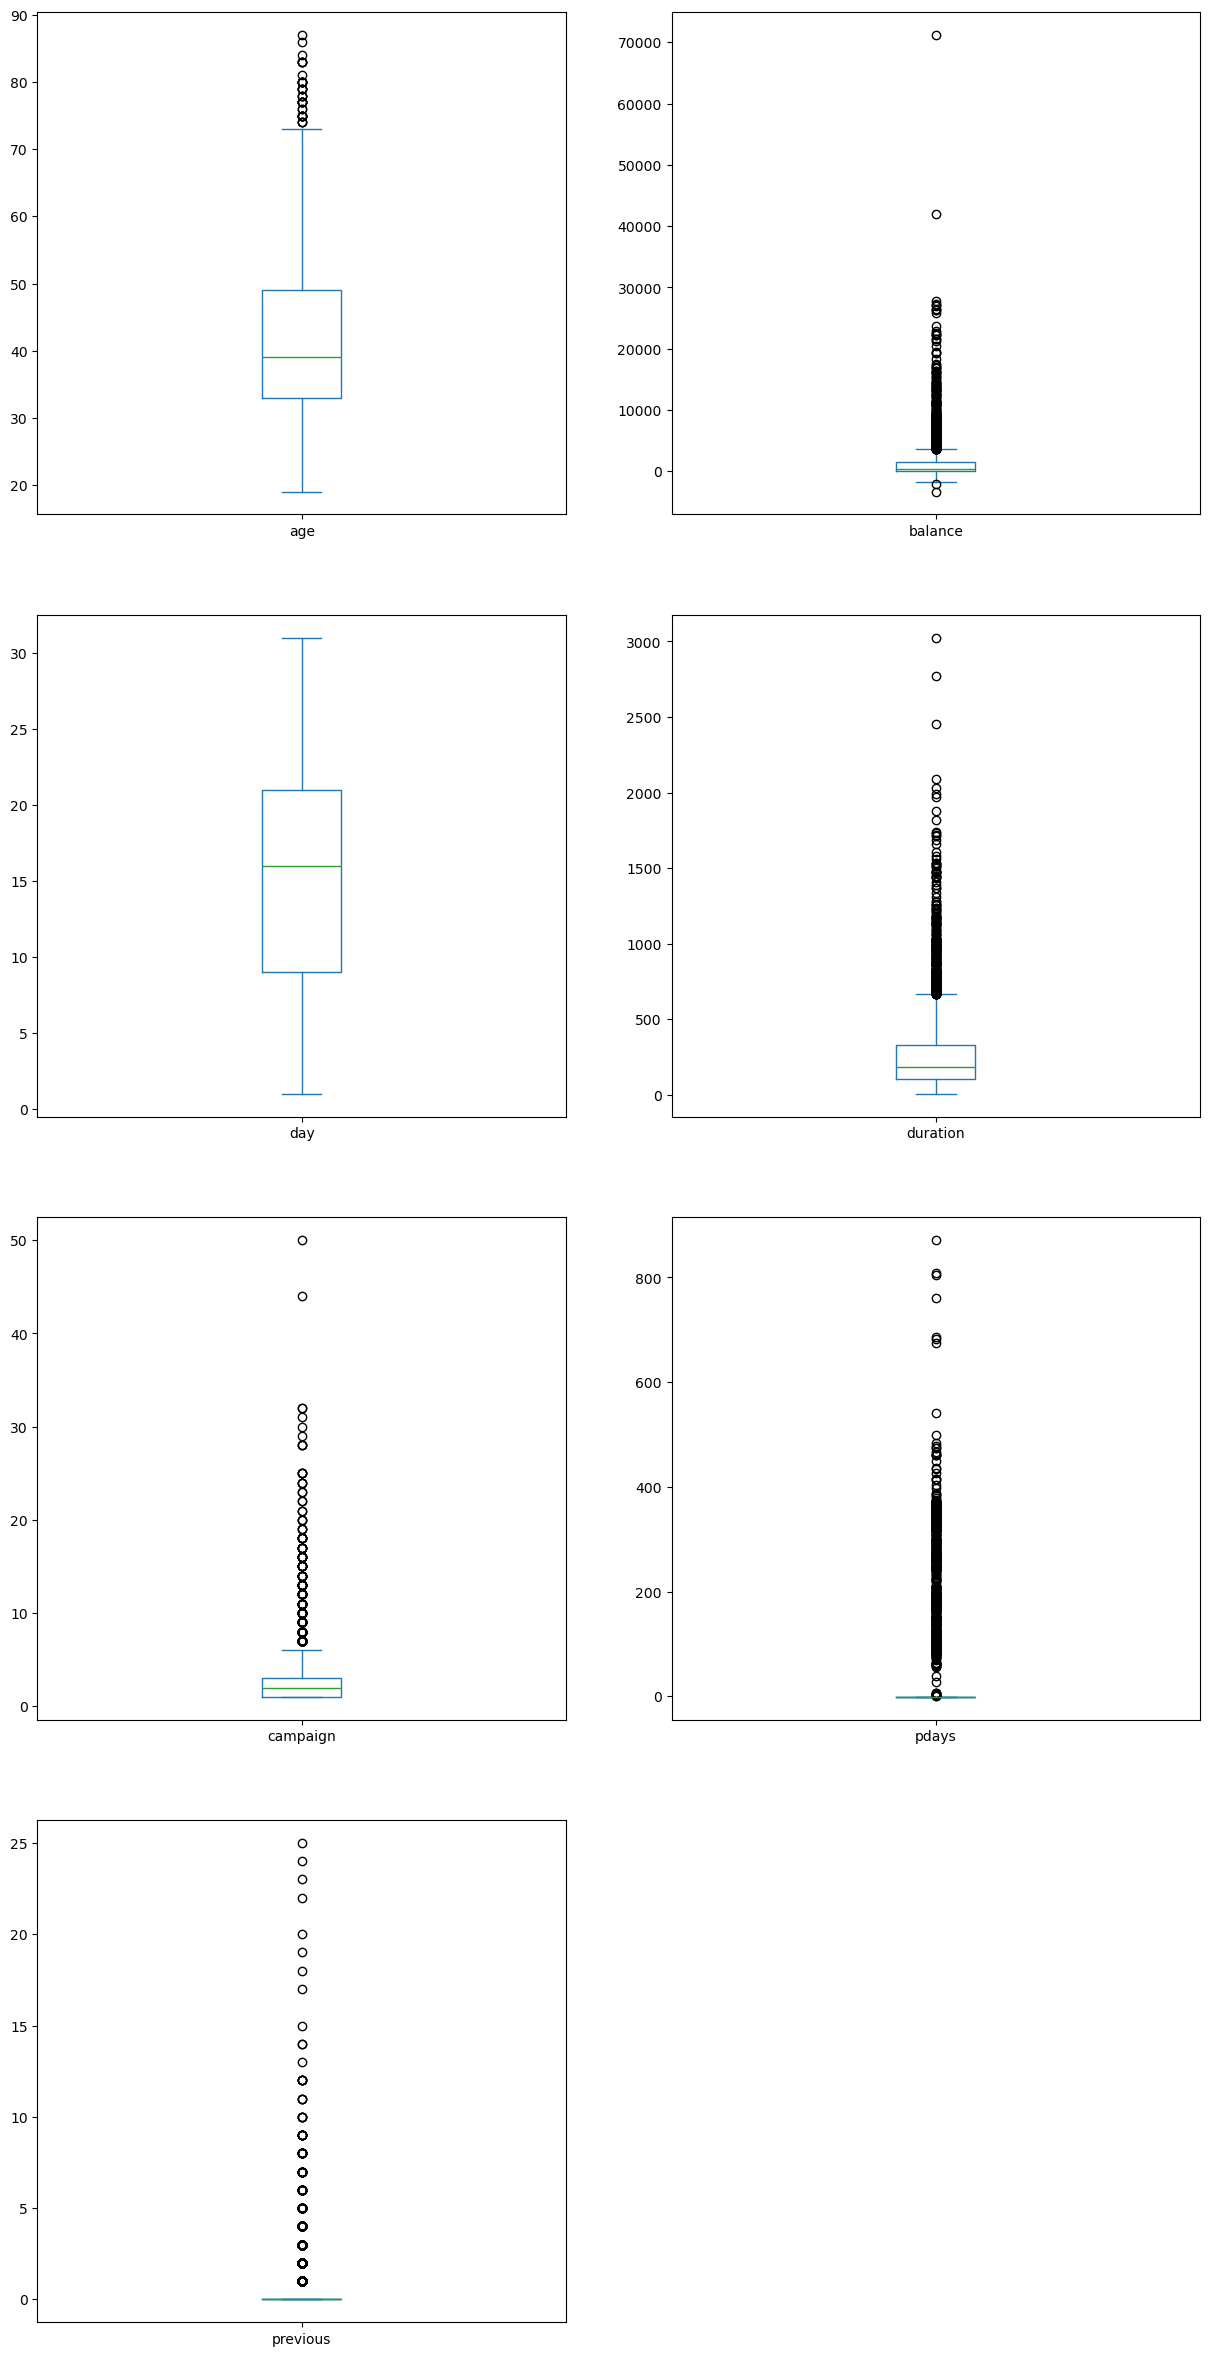

In [14]:
data.plot(kind= 'box', subplots= True, layout= (4,2), figsize= (15,30))
plt.show()

In [15]:
columns= ['age','balance','duration','campaign','pdays','previous']
for col in columns:
    q1= np.percentile(data[col], 25)
    q3= np.percentile(data[col], 75)
    iqr= q3 - q1
    lower= q1 - 1.5 * iqr
    upper= q3 + 1.5 * iqr
    data= data[(data[col] >= lower) & (data[col] <= upper)]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2799 entries, 0 to 4516
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        2799 non-null   int64 
 1   job        2799 non-null   object
 2   marital    2799 non-null   object
 3   education  2799 non-null   object
 4   default    2799 non-null   object
 5   balance    2799 non-null   int64 
 6   housing    2799 non-null   object
 7   loan       2799 non-null   object
 8   contact    2799 non-null   object
 9   day        2799 non-null   int64 
 10  month      2799 non-null   object
 11  duration   2799 non-null   int64 
 12  campaign   2799 non-null   int64 
 13  pdays      2799 non-null   int64 
 14  previous   2799 non-null   int64 
 15  poutcome   2799 non-null   object
 16  y          2799 non-null   object
dtypes: int64(7), object(10)
memory usage: 393.6+ KB


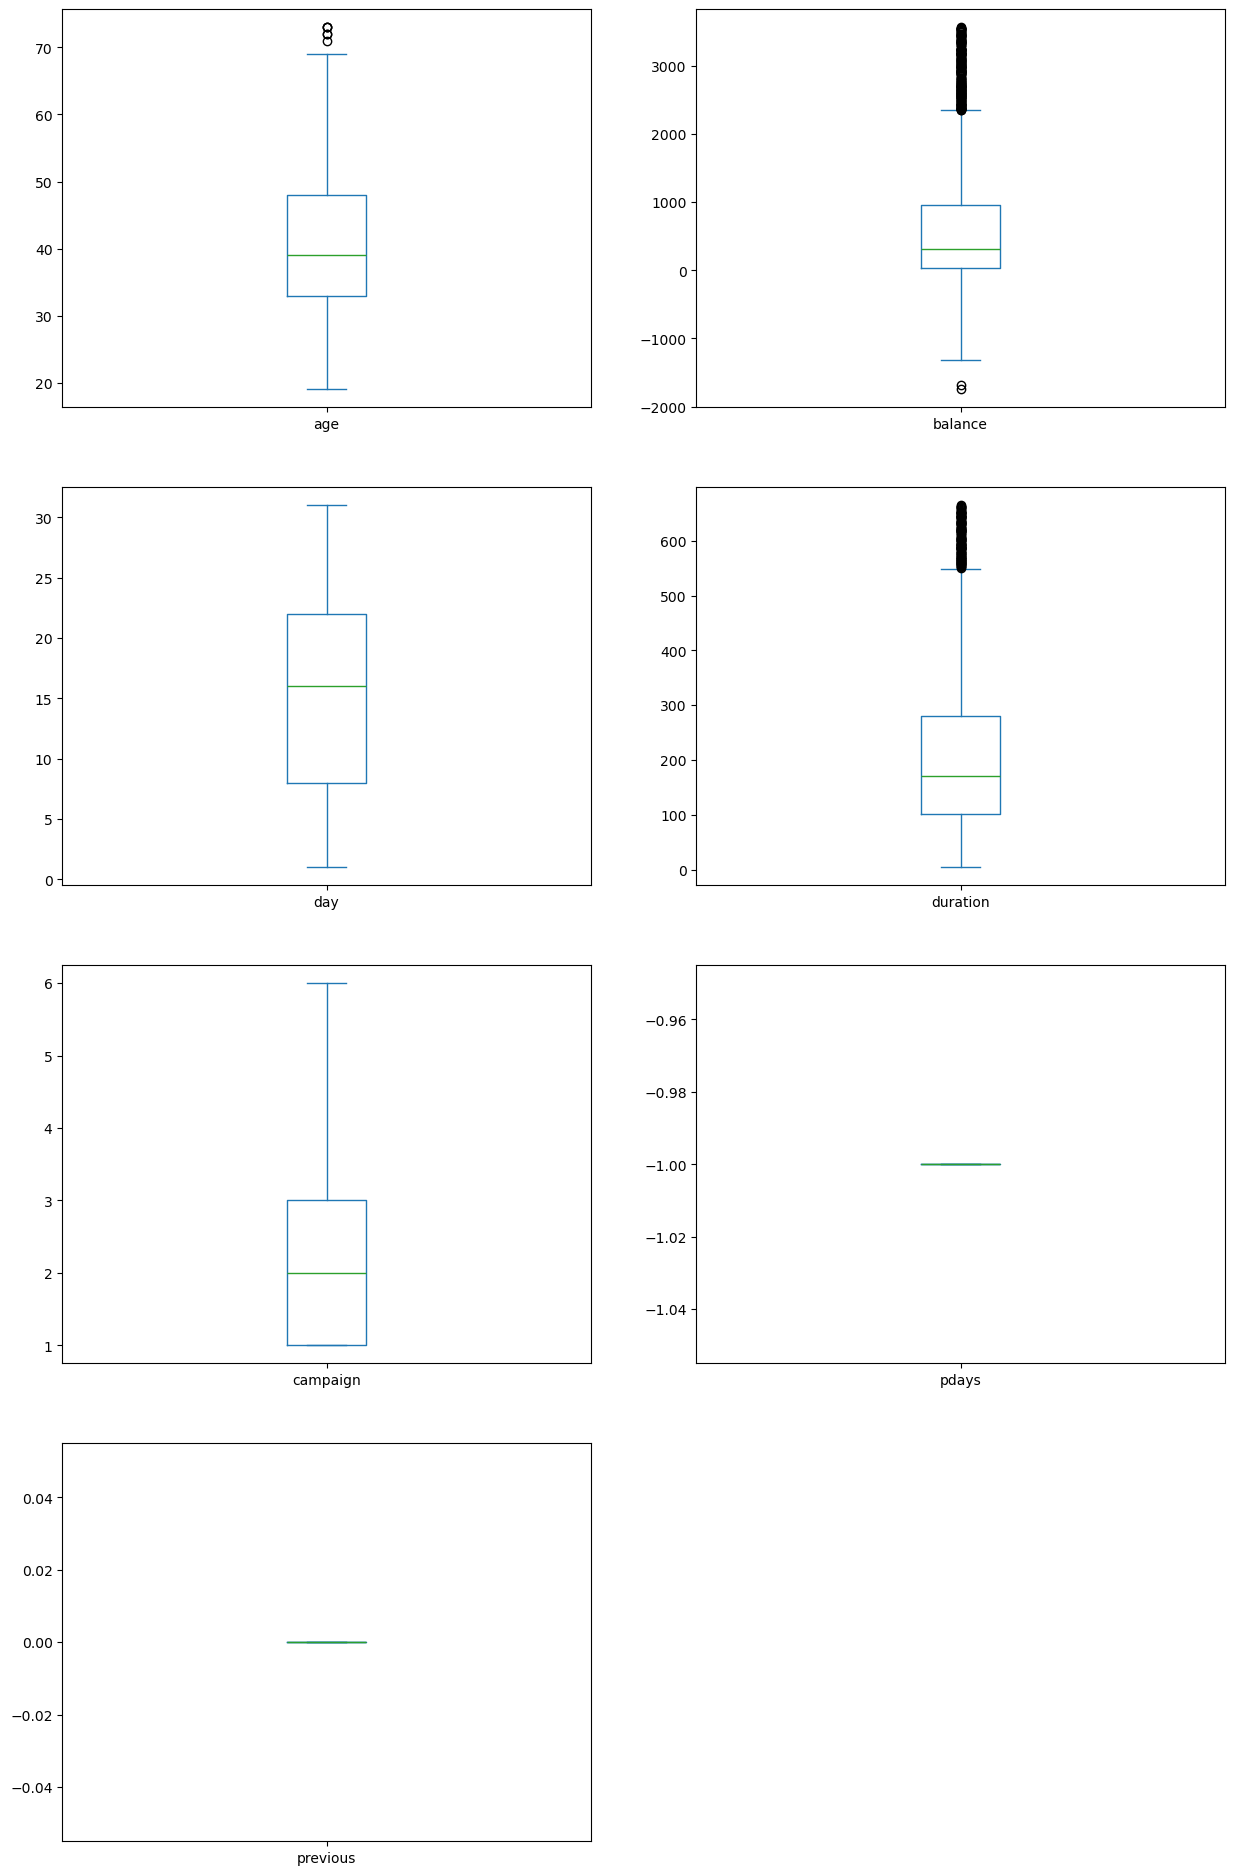

In [17]:
data.plot(kind= 'box', subplots= True, layout= (5,2), figsize= (15,30))
plt.show()

In [18]:
cols= data.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [19]:
le= LabelEncoder()
le

LabelEncoder()

In [20]:
data[cols]= data[cols].apply(le.fit_transform)

In [21]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,0,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,0,0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,0,0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,-1,0,0,0


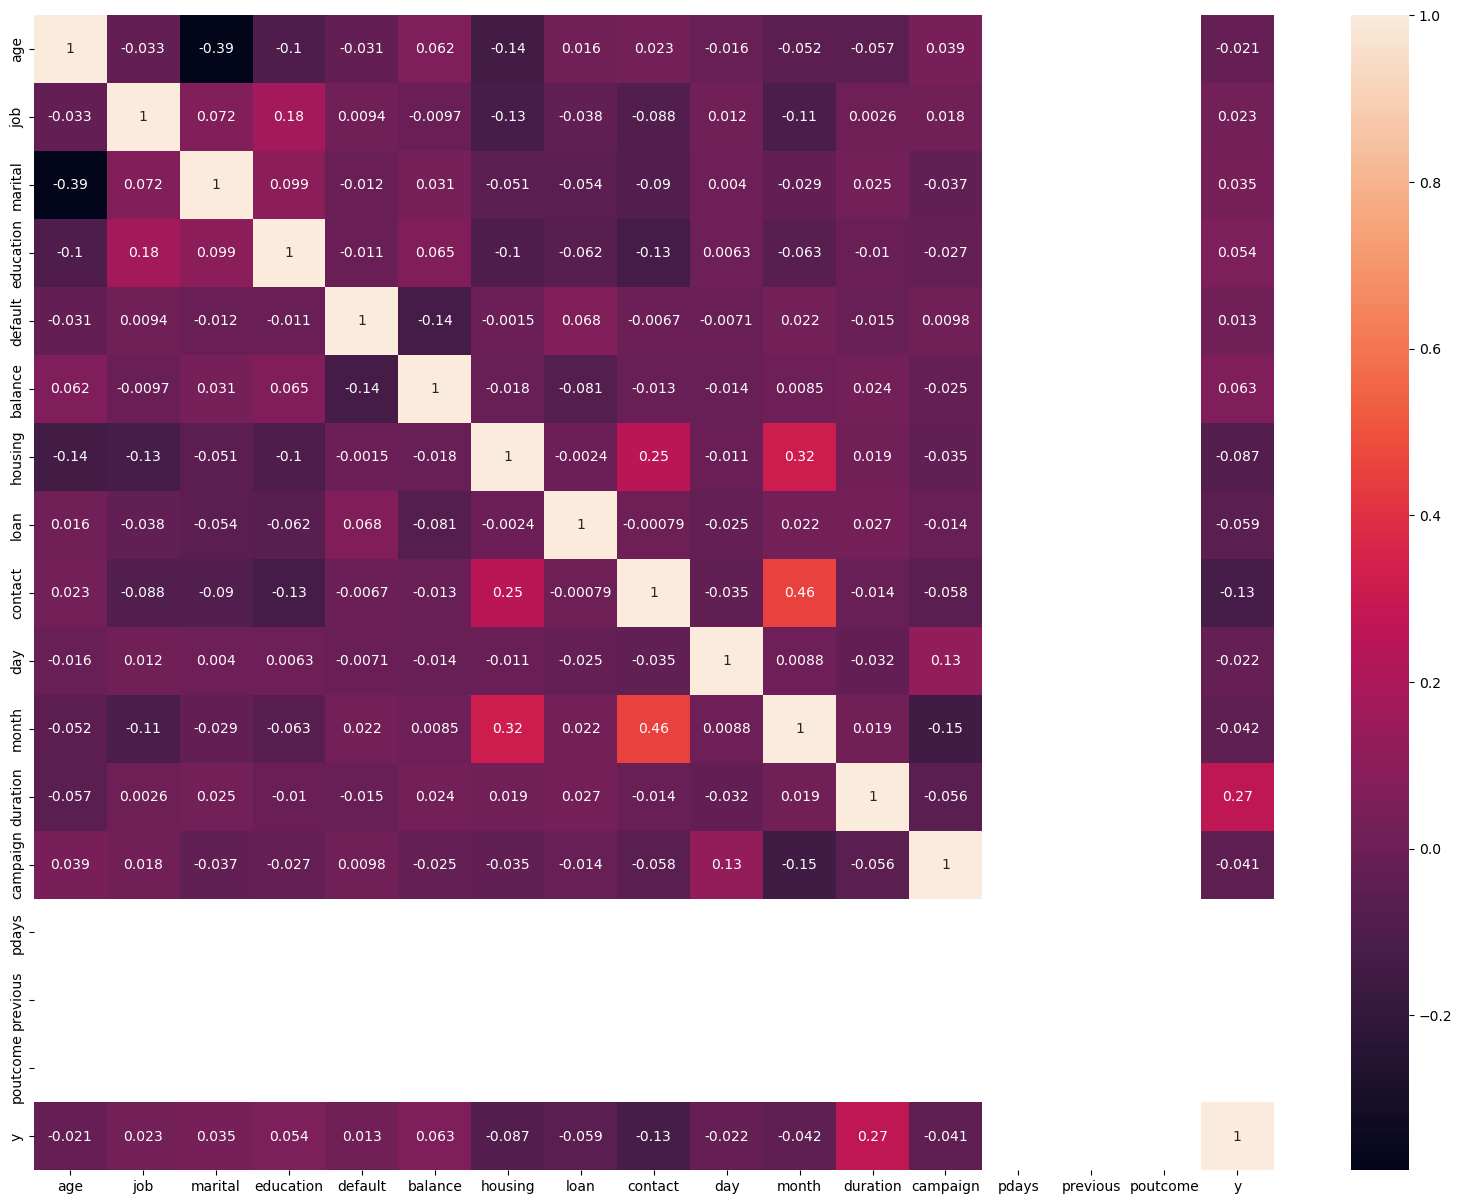

In [22]:
plt.figure(figsize= (20,15))
sns.heatmap(data.corr(), annot= True)
plt.show()

In [23]:
x= data.drop('y', axis= 1)
y= data.y

In [24]:
scaler= StandardScaler()
x_scaled= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [25]:
x_scaled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.063977,1.682282,-0.235015,-1.641600,-0.151744,1.316946,-1.129429,-0.446926,-0.817487,0.383790,1.554844,-0.893697,-0.886808,0.0,0.0,0.0
1,-1.063977,-0.135284,-0.235015,1.067621,-0.151744,0.961974,0.885403,2.237507,1.300187,-1.535760,0.164204,-0.073217,1.332723,0.0,0.0,0.0
2,1.875277,-1.044067,-0.235015,-0.286990,-0.151744,-0.722713,0.885403,-0.446926,1.300187,-1.295816,0.859524,0.111391,-0.886808,0.0,0.0,0.0
3,-0.151795,1.379355,-0.235015,-0.286990,-0.151744,-0.554930,0.885403,-0.446926,-0.817487,-1.175844,0.859524,-0.401409,-0.146964,0.0,0.0,0.0
4,0.050912,-0.741139,-0.235015,1.067621,-0.151744,-0.470467,0.885403,-0.446926,1.300187,-0.216069,0.859524,-1.044119,-0.146964,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,-0.455856,1.379355,-1.900346,-0.286990,-0.151744,-0.076688,0.885403,-0.446926,1.300187,0.503762,0.859524,-0.551831,-0.146964,0.0,0.0,0.0
2795,-0.050441,-1.044067,-0.235015,-0.286990,-0.151744,0.532813,0.885403,-0.446926,1.300187,1.583509,0.859524,3.078793,-0.146964,0.0,0.0,0.0
2796,0.861741,-1.044067,-0.235015,-0.286990,-0.151744,-0.355187,-1.129429,-0.446926,-0.817487,-0.216069,-1.574096,1.000244,-0.146964,0.0,0.0,0.0
2797,-0.861270,0.773499,1.430317,-0.286990,-0.151744,-0.182837,0.885403,-0.446926,-0.817487,-1.055872,-0.183456,2.832649,2.072567,0.0,0.0,0.0


In [26]:
train_x, test_x, train_y, test_y= train_test_split(x, y, test_size= 0.3, random_state= 42)

In [27]:
tree= DecisionTreeClassifier()
tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [28]:
print('Train Score: {}'.format(tree.score(train_x, train_y)))
print('Test Score: {}'.format(tree.score(test_x, test_y)))

Train Score: 1.0
Test Score: 0.9130952380952381


In [29]:
cross_val_score(tree, train_x, train_y, cv= 5).mean()

0.9142413487133985

In [30]:
y_pred= tree.predict(test_x)
print('Classification Report\n',classification_report(test_y, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       793
           1       0.23      0.23      0.23        47

    accuracy                           0.91       840
   macro avg       0.59      0.59      0.59       840
weighted avg       0.91      0.91      0.91       840



In [31]:
# Hyperparameter Tuning
# Grid Search cv to find best estimators for improving model performance
grid= {'max_depth': [3,5,7,10,None], 'criterion': ['gini','entropy'], 'min_samples_leaf': [3,5,7,9,10,20]}

In [33]:
gscv= GridSearchCV(tree, grid, cv= 5, verbose= 1)
gscv.fit(train_x,train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [39]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}

In [40]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

In [42]:
cross_val_score(gscv.best_estimator_, train_x, train_y, cv= 5).mean()

0.9397659063625451

In [43]:
clf= DecisionTreeClassifier(criterion= 'gini', max_depth= 3, min_samples_leaf= 20)
clf.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

In [46]:
print('Train Score: {}'.format(clf.score(train_x, train_y)))
print('Test Score: {}'.format(clf.score(test_x, test_y)))

Train Score: 0.9397651863195507
Test Score: 0.944047619047619


In [48]:
pred_y= clf.predict(test_x)

In [50]:
cm= confusion_matrix(pred_y, test_y)
print(cm)
plt.show()

[[793  47]
 [  0   0]]


In [53]:
print('Classification Report\n',classification_report(pred_y, test_y))

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       840
           1       0.00      0.00      0.00         0

    accuracy                           0.94       840
   macro avg       0.50      0.47      0.49       840
weighted avg       1.00      0.94      0.97       840



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
accuracy= accuracy_score(test_y, pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 94.4047619047619


In [55]:
cross_val= cross_val_score(clf, test_x, test_y, cv= 5).mean()
print("Cross Validation Accuracy Scores of Decision Tree :",cross_val*100)

Cross Validation Accuracy Scores of Decision Tree : 94.40476190476191


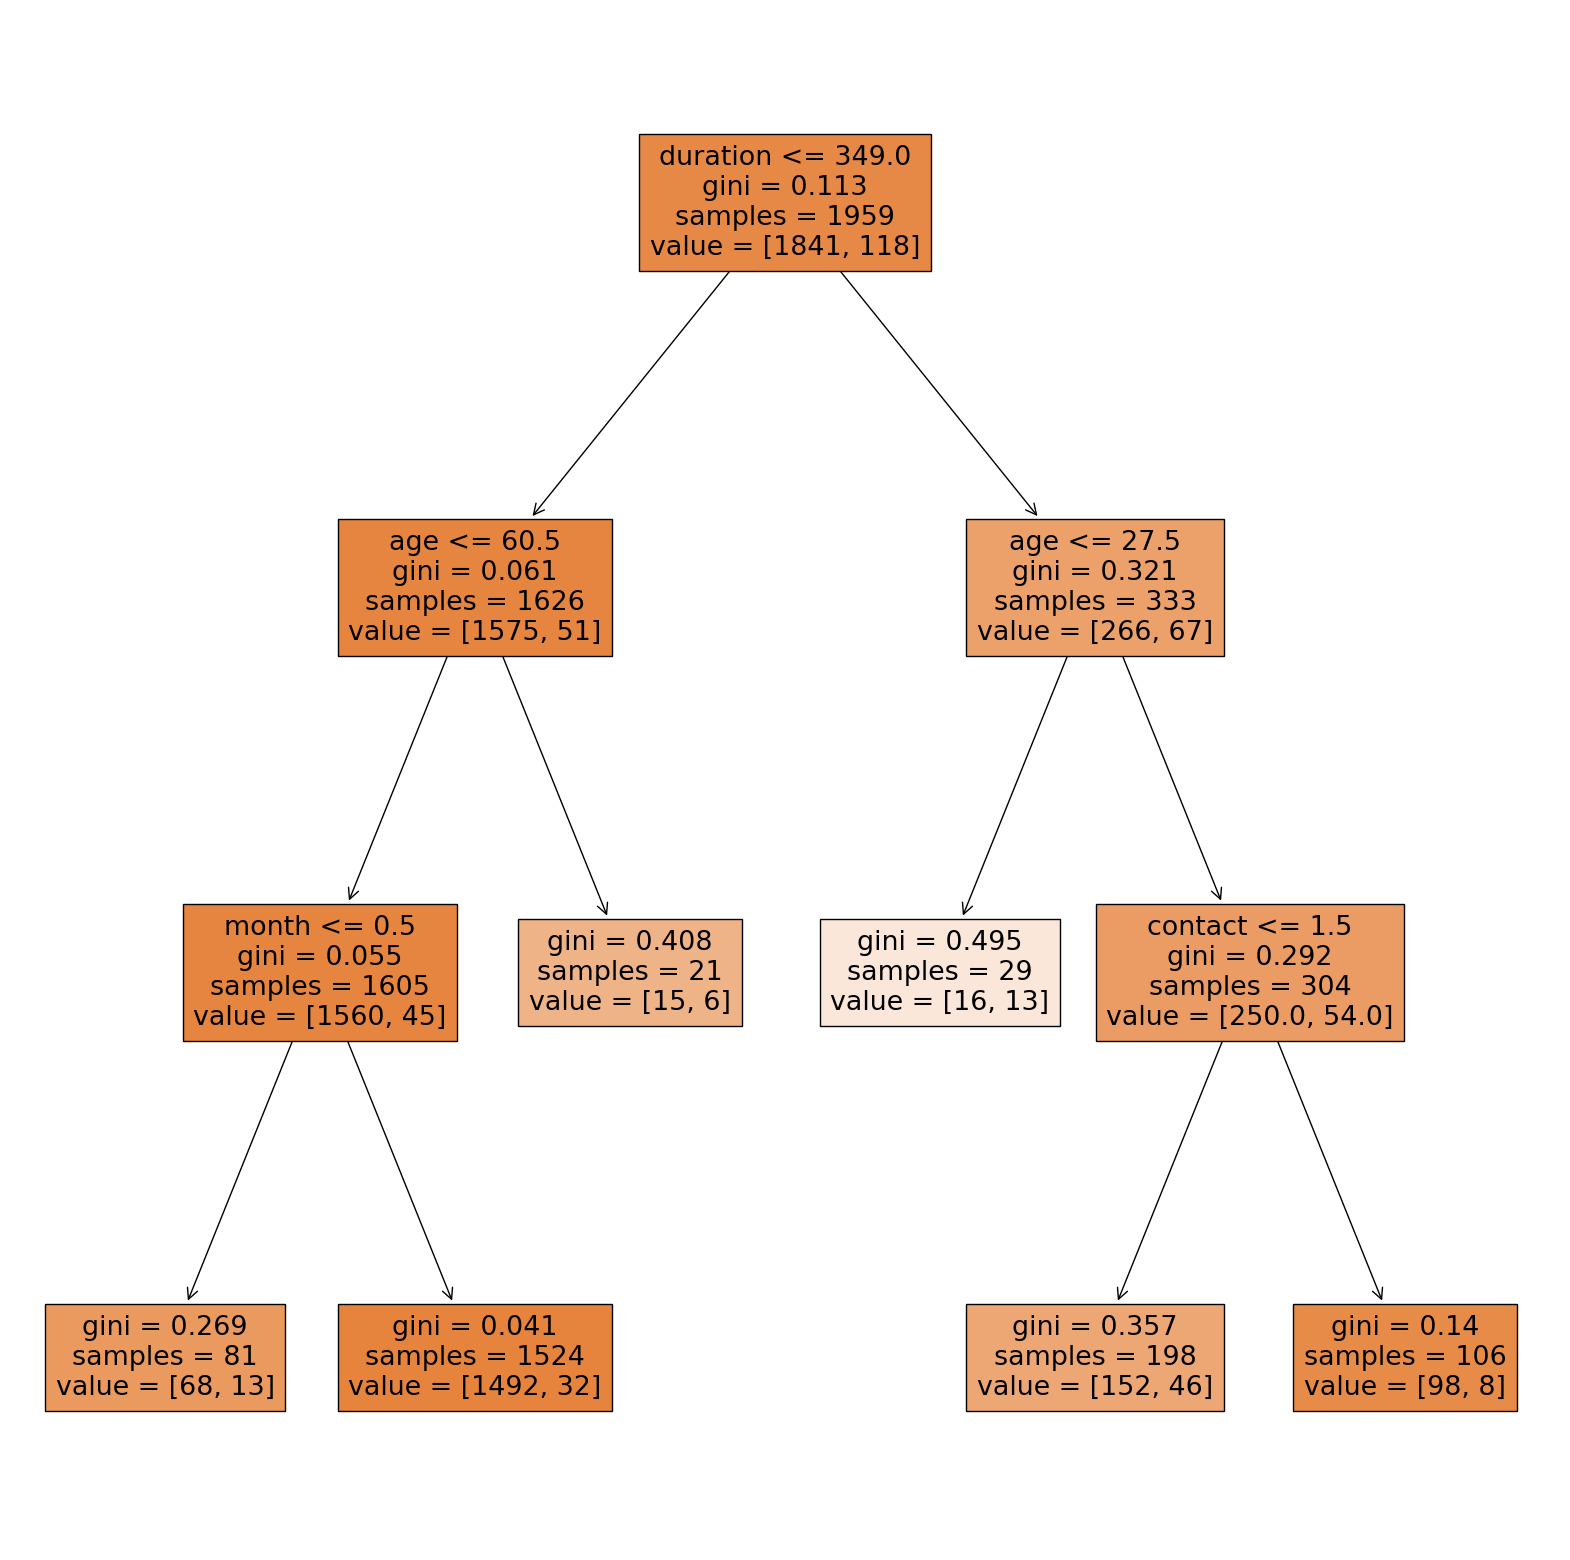

In [59]:
# Visualising Tree
from sklearn import tree
fig= plt.figure(figsize= (20,20))
t= tree.plot_tree(clf, filled=True, feature_names= x.columns)

# End of Project